# Simplicial Complexes and Data

This notebook is adapted from the [course repo](https://github.com/trneedham/TDASpring21) by Dr. Tom Needham.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

## Vietoris-Rips Complexes

Recall that if $(X,d)$ is a finite metric space and $r \geq 0$, we define the *Vietoris-Rips complex for $X$ at scale $r$* to be the simplicial complex $\mathrm{VR}^r(X) = (V_r,\Sigma_r)$, where $V_r = X$ for all $r$ and 
$$
\Sigma_r = \{(x_{i_0},\ldots,x_{i_k}) \mid d(x_{i_m},x_{i_n}) \leq r \; \forall \; m,n\}.
$$


Below we show how to draw the Vietoris-Rips complex for a set of points in $\mathbb{R}^2$.


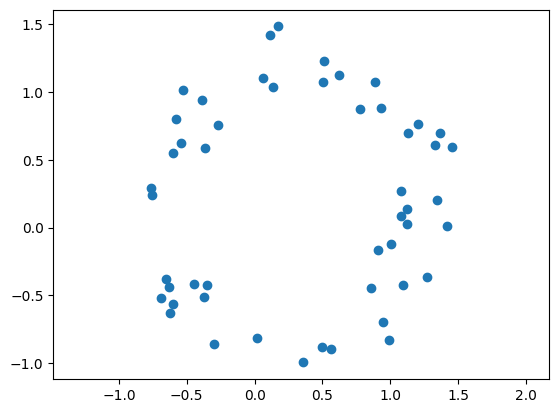

In [2]:
num_points = 50

X = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = num_points)
X = X.T/np.linalg.norm(X,axis = 1)
X = X.T + 0.5*np.random.rand(num_points,2)

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

We compute the pairwise distances between the points.

In [3]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)

Given the distance matrix and a scale $r$, we can compute the 1-skeleton of the Vietoris-Rips complex.

In [5]:
def create_simplicial_complex(D,r):
    """
    Input: distance matrix and nonnegative radius
    Output: networkx graph 
    """
    
    G = nx.Graph()
    G.add_nodes_from(list(range(len(D))))
    edge_list = np.argwhere(D <= r) 
    G.add_edges_from(edge_list)
    
    # Remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))
    
    return G

The $1$-skeleta of the Vietoris-Rips complexes look like this:

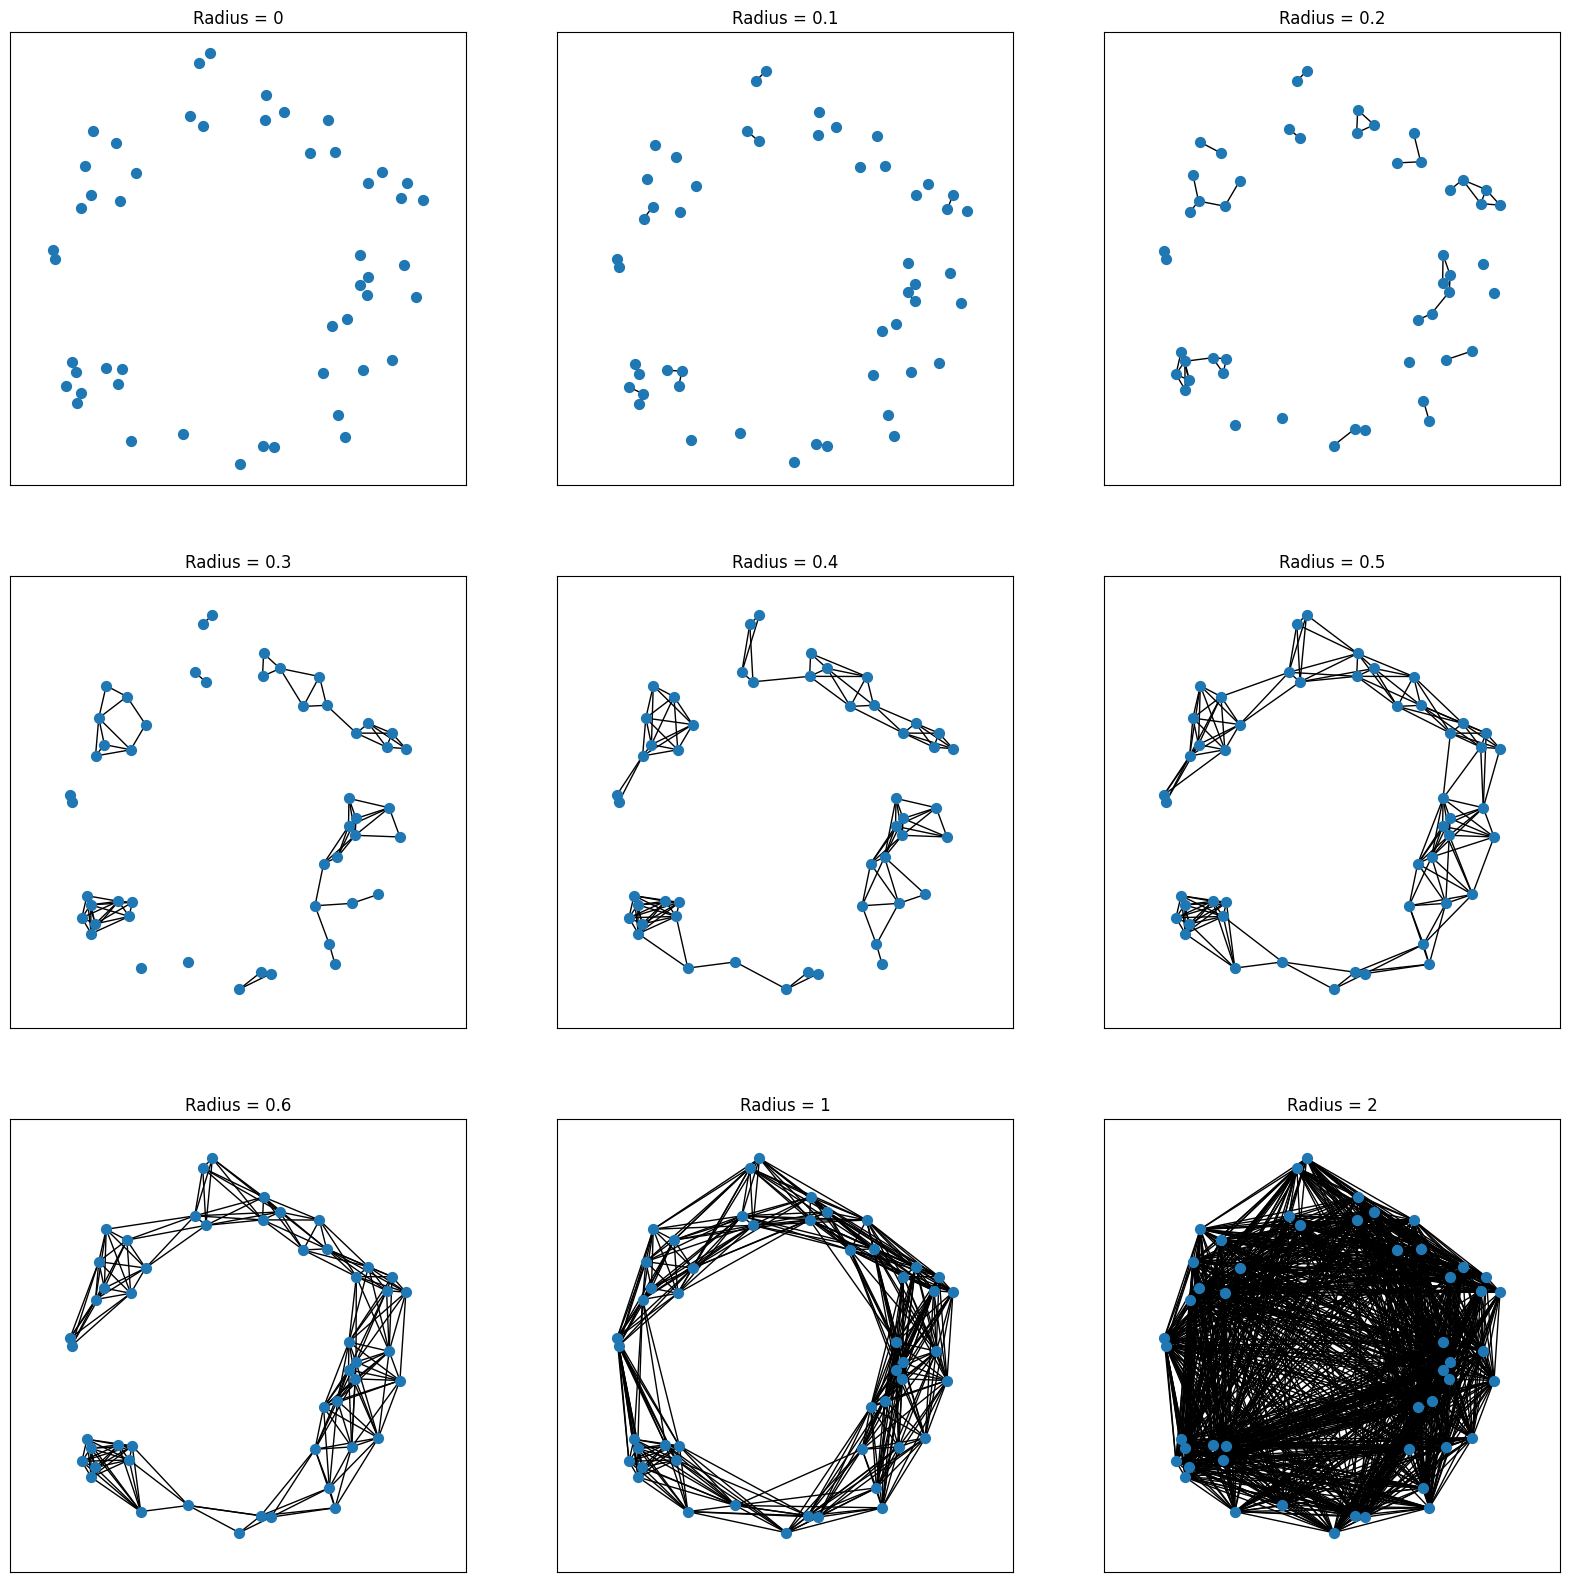

In [6]:
rs = [0,0.1,0.2,0.3,0.4,0.5,0.6,1,2]
pos = {n:X[n,:] for n in range(len(X))}

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G = create_simplicial_complex(D,r)
    plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

For this dataset, there is a 'loop structure' which may be of interest. To see it computationally, we would want to track $1$-dimensional homology over various scales. As it stands, the 1-dimensional homology would see lots and lots of very small holes, which would not sufficiently accentuate the large apparent loop. We can remedy this by including higher-dimensional simplices.

In what follows, I'll compute the $2$-skeleton of the Vietoris-Rips complexes. Note that if we are interested in degree-$k$ homology of the dataset, it suffices to use the $k+1$-skeleton of the VR complex, since
$$
H_k(\mathrm{VR}_r(X)) = \mathrm{ker}(\partial_k) / \mathrm{im}(\partial_{k+1}).
$$

We need to use some more involved tools to compute and draw $2$-simplices.

Let's work at a fixed resolution to design the plotting tool.

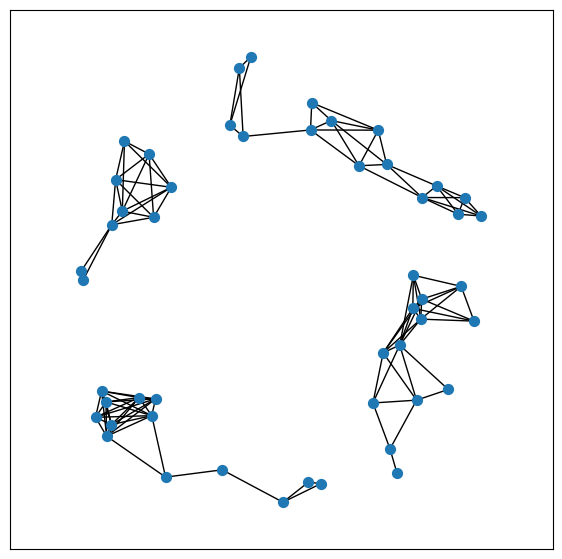

In [7]:
plt.figure(figsize = (7,7))
r = 0.4
G = create_simplicial_complex(D,r)
nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
plt.axis('equal')
plt.show()

Here is the code for creating the 2-skeleton of the Vietoris-Rips complex.

In [8]:
def create_2_dim_simplicial_complex(D,r):
    
    # Create 1-skeleton
    G = create_simplicial_complex(D,r)
    
    # Get a list of 2-simplices
    two_spx_list = []
    
    # Naive search for viable 2-simplices
    for edge in G.edges():
        for vertex in G.nodes():
            if vertex != edge[0] and vertex != edge[1] and D[edge[0],vertex] < r and D[edge[1],vertex] < r:
                two_spx_list.append([edge[0],edge[1],vertex])
                
    return G, two_spx_list

In [9]:
G, two_spx_list = create_2_dim_simplicial_complex(D,r)
two_spx_list

[[0, 11, 33],
 [0, 11, 38],
 [0, 11, 49],
 [0, 33, 11],
 [0, 33, 38],
 [0, 33, 49],
 [0, 38, 11],
 [0, 38, 33],
 [0, 38, 49],
 [0, 49, 11],
 [0, 49, 33],
 [0, 49, 38],
 [1, 6, 20],
 [1, 20, 6],
 [2, 4, 8],
 [2, 4, 16],
 [2, 8, 4],
 [2, 8, 10],
 [2, 8, 16],
 [2, 10, 8],
 [2, 10, 16],
 [2, 10, 18],
 [2, 16, 4],
 [2, 16, 8],
 [2, 16, 10],
 [2, 16, 18],
 [2, 18, 10],
 [2, 18, 16],
 [3, 5, 13],
 [3, 5, 23],
 [3, 5, 25],
 [3, 5, 28],
 [3, 5, 31],
 [3, 5, 44],
 [3, 13, 5],
 [3, 13, 23],
 [3, 13, 25],
 [3, 13, 28],
 [3, 13, 31],
 [3, 13, 44],
 [3, 23, 5],
 [3, 23, 13],
 [3, 23, 25],
 [3, 23, 28],
 [3, 23, 31],
 [3, 23, 44],
 [3, 25, 5],
 [3, 25, 13],
 [3, 25, 23],
 [3, 25, 28],
 [3, 25, 31],
 [3, 25, 44],
 [3, 28, 5],
 [3, 28, 13],
 [3, 28, 23],
 [3, 28, 25],
 [3, 28, 31],
 [3, 28, 44],
 [3, 31, 5],
 [3, 31, 13],
 [3, 31, 23],
 [3, 31, 25],
 [3, 31, 28],
 [3, 31, 44],
 [3, 44, 5],
 [3, 44, 13],
 [3, 44, 23],
 [3, 44, 25],
 [3, 44, 28],
 [3, 44, 31],
 [4, 8, 2],
 [4, 8, 16],
 [4, 16, 2],
 [4, 1

To draw the simplices, we'll use the `Polygon` function imported above. We'll add the triangles one-by-one to a collection, then use plotting tools to display them.

In [10]:
patches = []

for i,spx in enumerate(two_spx_list):
    position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
    polygon = Polygon(position_array, True)
    patches.append(polygon)

/var/folders/8x/n76q6dh55j16w8kmmrtbk__c0000gn/T/ipykernel_23621/613448878.py:5: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = Polygon(position_array, True)


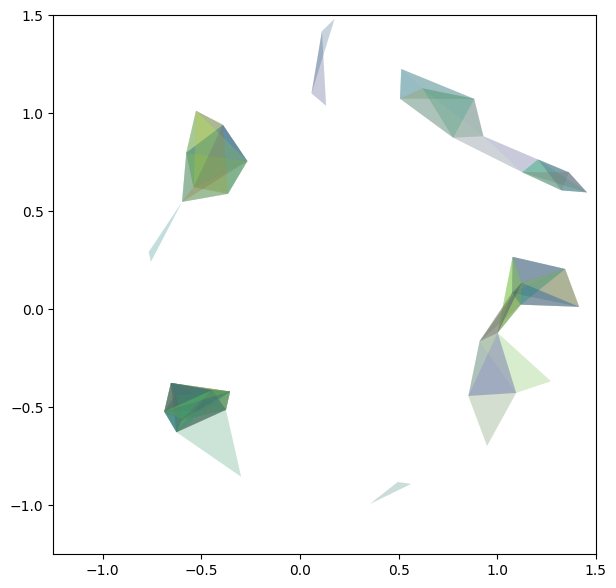

In [11]:
fig, ax = plt.subplots(figsize = (7,7))

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.1)
p.set_array(np.array(colors))
ax.add_collection(p)

plt.xlim([-1.25, 1.5])
plt.ylim([-1.25, 1.5])
plt.show()

Now we'll plot the 1-skeleton first and overlay the triangles.

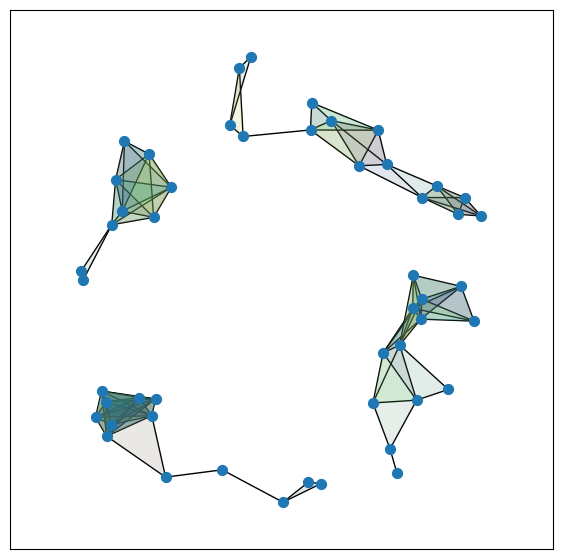

In [12]:
fig, ax = plt.subplots(figsize = (7,7))

nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 50)
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.05)
p.set_array(np.array(colors))
ax.add_collection(p)

plt.axis('equal')
plt.show()

Looks good! Now let's run it on a range of radii. We'll decrease the max radius in our pictures, since the number of triangles blows up factorially and it eventually takes forever to draw all of them.

/var/folders/8x/n76q6dh55j16w8kmmrtbk__c0000gn/T/ipykernel_23621/2314090798.py:12: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = Polygon(position_array, True)


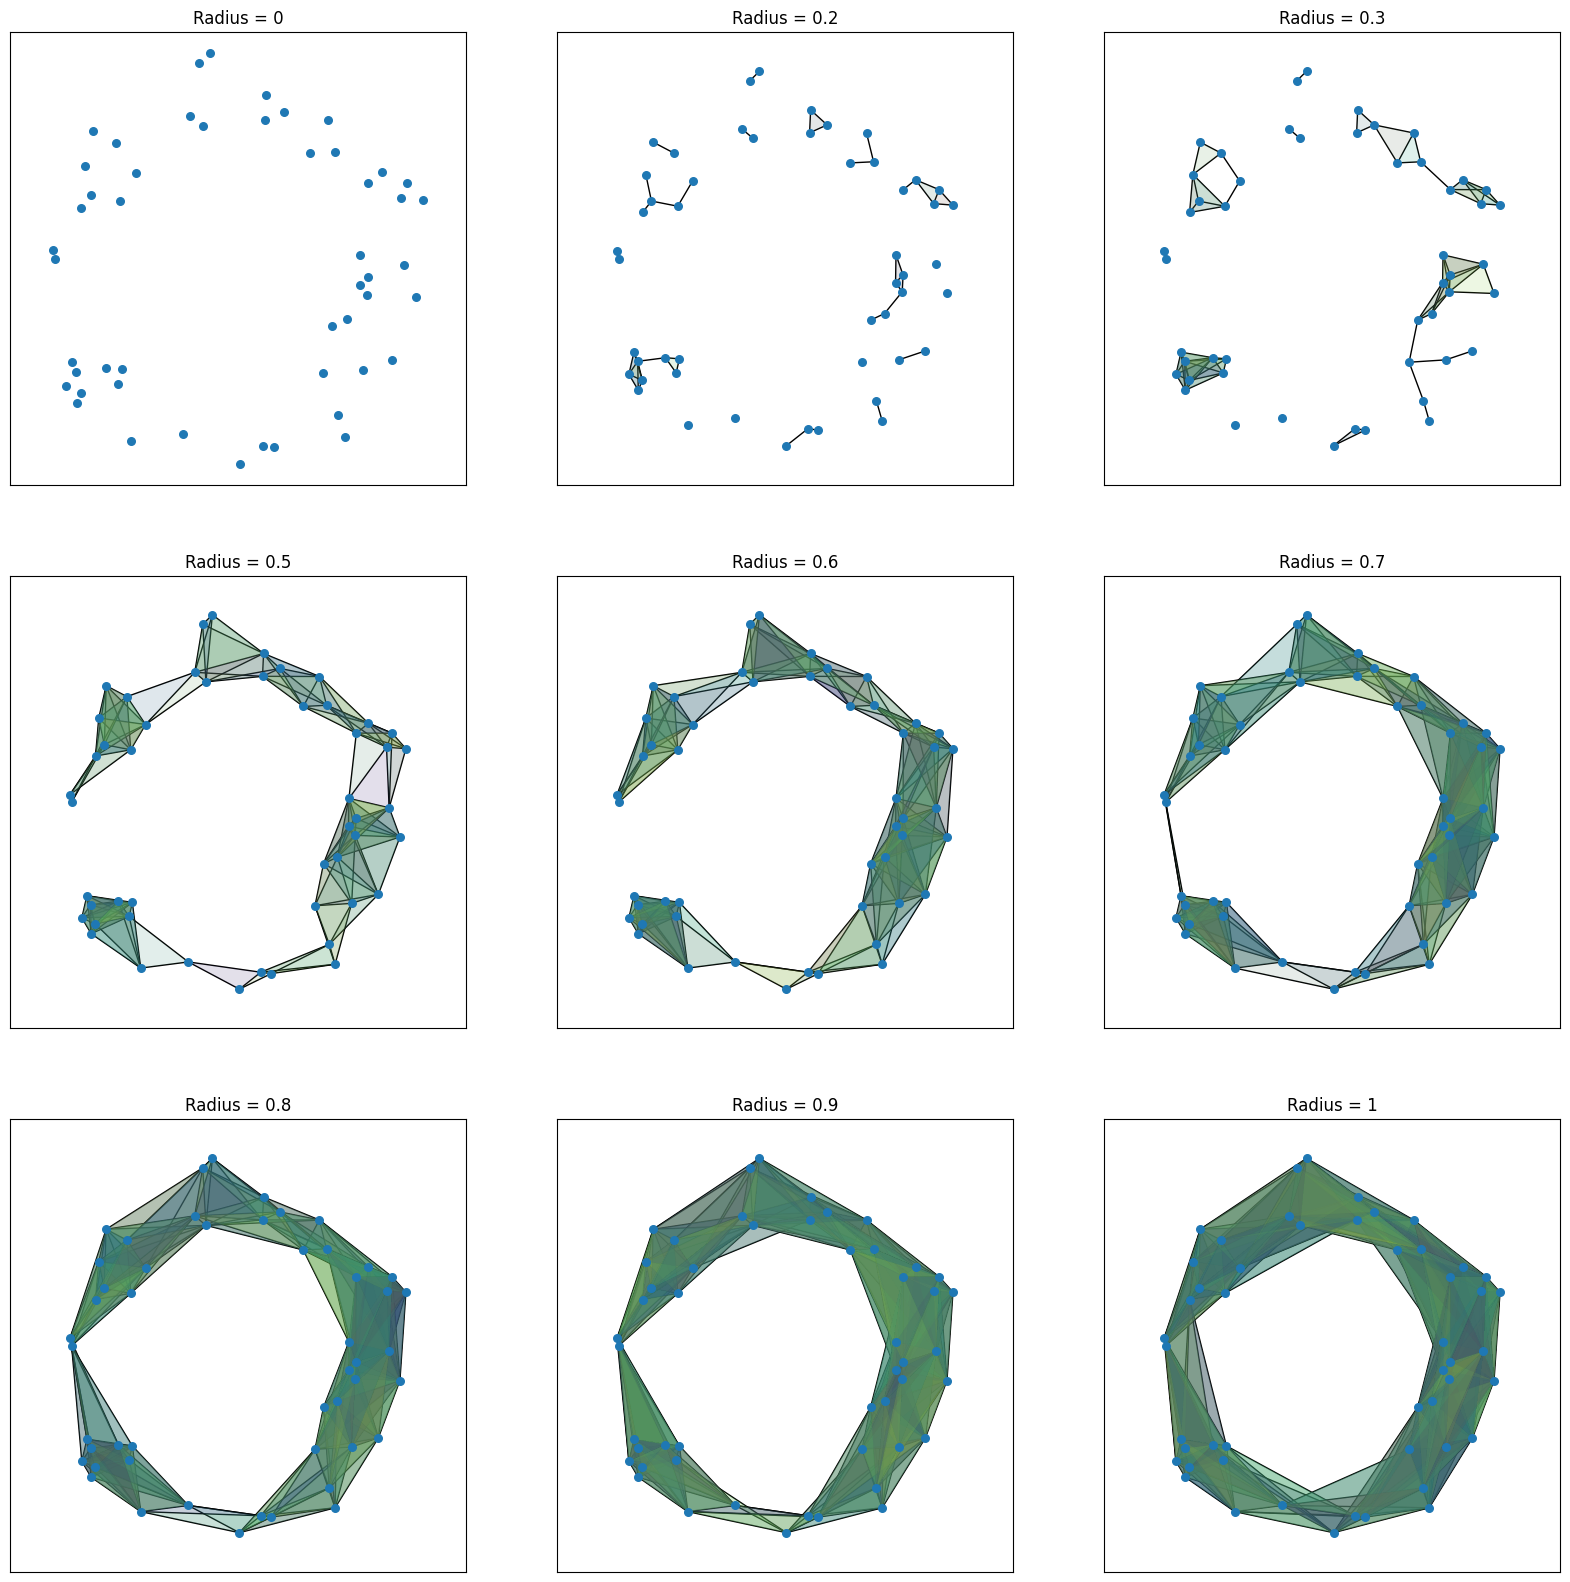

In [13]:
rs = [0,0.2,0.3,0.5,0.6,0.7,0.8,0.9,1]
pos = {n:X[n,:] for n in range(len(X))}

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G, two_spx_list = create_2_dim_simplicial_complex(D,r)
    patches = []

    for i,spx in enumerate(two_spx_list):
        position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
        polygon = Polygon(position_array, True)
        patches.append(polygon)
        
    ax = plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 30)
    colors = 100*np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=0.05)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

We see that loops appear in the data:
- small loops appear earlier in the process but are quickly filled in
- a much stronger loop appears a bit later but persists for a long time
- the large loop will also eventually be filled in, but the idea is that keep track of how features change over 'filtration values' (values of $r$).

## Persistent Homology

The Vietoris-Rips complexes for a metric space $X$ across all scales $r$ become a *filtration* $\mathrm{VR}^r(X)$ of simplicial complexes.

The *$k$ th Vietoris-Rips persistence module of $X$* to consist of the following data:
- For each $r \geq 0$, we have a vector space
$$
H_k(\mathrm{VR}^r(X))
$$
- For each pair $r,s$ with $r \leq s$, we have a linear map
$$
H_k(\mathrm{VR}^r(X)) \to H_k(\mathrm{VR}^s(X))
$$
which is induced (by functoriality!) by the simplicial map $\mathrm{VR}^r(X) \to \mathrm{VR}^s(X)$ coming from the identity map on the vertex set $X$.

This structure is also referred to as the *persistent homology* of the Vietoris-Rips complex.

This is a very rich/complex way to encode information about the dataset $X$. This should lead you to the following

**Question:** How can a persistence module be used in practice?

That is, we need ways to 
- conveniently represent and visualize persistence modules, and
- compare persistence modules coming from different datasets.

## Persistence Diagrams and Barcodes

To address the first part of the question, here is some code which can be used to represent/visualize persistence modules.

**Remark:** From now on, we will start using more specialized software packages. If you are following along on your machine, it's possible that installation of these packages will not be as straightforward as it is for more 'mainstream' packages. Talk with me in office hours if you need some help with installation.

We'll use a TDA package called `gudhi`. Documentation for the package is here: http://gudhi.gforge.inria.fr.

In [14]:
import gudhi as gd

Let's first study the dataset that we were looking at above. In `gudhi`, we create the Vietoris-Rips complex using the following functions. I'm passing in some options which will only construct the $2$-skeleton of the VR complex.

In [15]:
skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 2) 
Rips_complex = skeleton.create_simplex_tree(max_dimension = 2)

Here `simplex_tree` refers to a specific data structure for simplicial complexes used in `ghudi`.

The VR complex is stored as a simplicial complex, together with a 'filtration' value for the simplex. This is the radius at which the simplex first appears in $\mathrm{VR}_r(X)$. 

Let's see how many simplices there are and print off the first couple of hundred to see what the structure looks like.

In [16]:
rips_filtration = Rips_complex.get_filtration()
rips_list = list(rips_filtration)
print('Number of Simplices:',len(rips_list))
for splx in rips_list[0:200] :
    print(splx)

Number of Simplices: 13716
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
([7], 0.0)
([8], 0.0)
([9], 0.0)
([10], 0.0)
([11], 0.0)
([12], 0.0)
([13], 0.0)
([14], 0.0)
([15], 0.0)
([16], 0.0)
([17], 0.0)
([18], 0.0)
([19], 0.0)
([20], 0.0)
([21], 0.0)
([22], 0.0)
([23], 0.0)
([24], 0.0)
([25], 0.0)
([26], 0.0)
([27], 0.0)
([28], 0.0)
([29], 0.0)
([30], 0.0)
([31], 0.0)
([32], 0.0)
([33], 0.0)
([34], 0.0)
([35], 0.0)
([36], 0.0)
([37], 0.0)
([38], 0.0)
([39], 0.0)
([40], 0.0)
([41], 0.0)
([42], 0.0)
([43], 0.0)
([44], 0.0)
([45], 0.0)
([46], 0.0)
([47], 0.0)
([48], 0.0)
([49], 0.0)
([1, 6], 0.051356805702569695)
([3, 25], 0.06493724548355145)
([15, 32], 0.06880881935587503)
([5, 31], 0.06991916780759015)
([37, 47], 0.07121748523490933)
([19, 37], 0.07450566318681864)
([29, 39], 0.0893517663368247)
([23, 44], 0.0920963198814813)
([13, 23], 0.0952548282971322)
([20, 48], 0.09555688131888915)
([24, 36], 0.09719493774147338)
([28, 31], 0.09763741965576883)
([33,

Okay... so now we have a VR complex. But what do we do with it? The following code computes the persistence module for the Vietoris-Rips complex and represents it in a particular way.

In [17]:
BarCodes = Rips_complex.persistence()

Looking at the result...

In [18]:
BarCodes

[(1, (0.6263781999949602, 1.4811454195819689)),
 (1, (0.222056433366833, 0.31220045535757746)),
 (1, (0.423968592938835, 0.44499989758838504)),
 (1, (0.40571788792170677, 0.41955814470620933)),
 (1, (0.3202912794293509, 0.3216219034419027)),
 (0, (0.0, inf)),
 (0, (0.0, 0.4742040373395714)),
 (0, (0.0, 0.42732966419083057)),
 (0, (0.0, 0.4013677412410926)),
 (0, (0.0, 0.3828629076986011)),
 (0, (0.0, 0.3761183907177724)),
 (0, (0.0, 0.35010196195116267)),
 (0, (0.0, 0.32189365110015616)),
 (0, (0.0, 0.3170831422942757)),
 (0, (0.0, 0.30627412219871947)),
 (0, (0.0, 0.28413077972830114)),
 (0, (0.0, 0.27217733475553574)),
 (0, (0.0, 0.26959376619983516)),
 (0, (0.0, 0.26633989735745867)),
 (0, (0.0, 0.24289534538874327)),
 (0, (0.0, 0.2303469362283527)),
 (0, (0.0, 0.2194501709708746)),
 (0, (0.0, 0.20581137092314536)),
 (0, (0.0, 0.19594794523813228)),
 (0, (0.0, 0.19358607021842197)),
 (0, (0.0, 0.1858747930919378)),
 (0, (0.0, 0.18558454191700094)),
 (0, (0.0, 0.18524185662863357)),


So it's a bunch of things of the form $(d,(x,y))$. We can plot these things in a couple of ways. Let's see if we can guess what this representation is telling us about the data.

The following is called a *persistence diagram*.

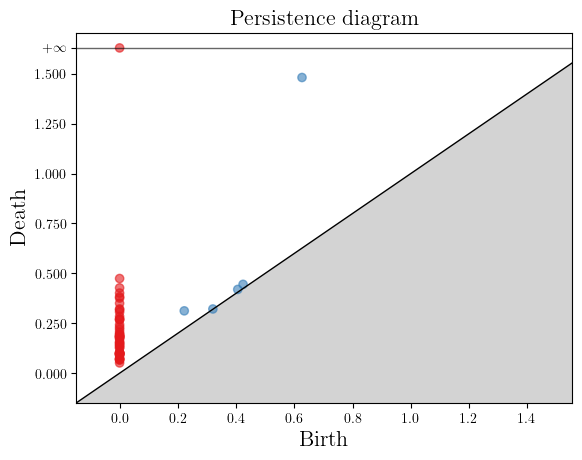

In [19]:
gd.plot_persistence_diagram(BarCodes)
plt.show()

The following is called a *barcode representation*.

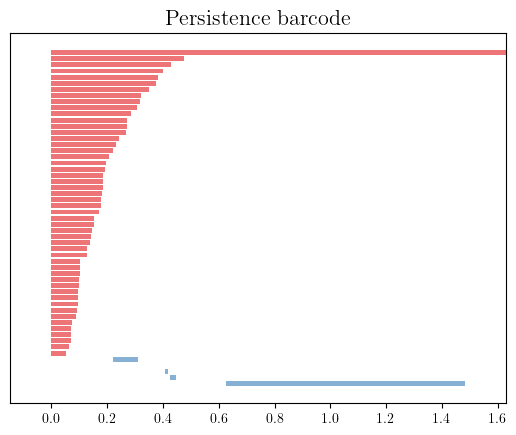

In [20]:
gd.plot_persistence_barcode(BarCodes)
plt.show()

Any guesses for what this represents?

## Another Example

Let's run this pipeline on one more example to get an intuitive feel for how it works.

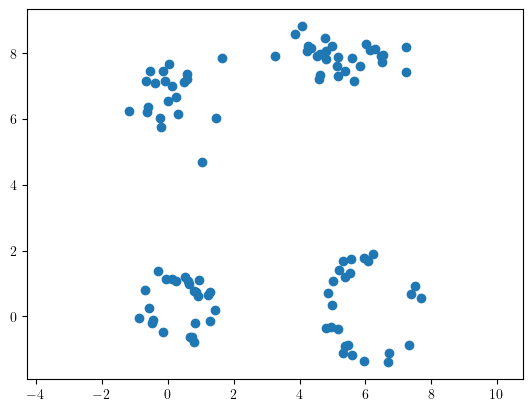

In [23]:
A = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = 25)
A = A.T/np.linalg.norm(A,axis = 1)
A = A.T + 0.5*np.random.rand(25,2)

Y = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = 25)
Y = 1.5*Y.T/np.linalg.norm(Y,axis = 1)
Y = Y.T + 0.5*np.random.rand(25,2) + [6,0]

Z1 = np.random.multivariate_normal([0,7],np.array([[0.2,0],[0,1]]),size = 20)
Z2 = np.random.multivariate_normal([5,8],np.array([[1,0],[0,0.2]]),size = 30)

X = np.concatenate((A,Y,Z1,Z2))

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

In [24]:
D = pairwise_distances(X)

Radius 0 done...
Radius 0.25 done...
Radius 0.5 done...


/var/folders/8x/n76q6dh55j16w8kmmrtbk__c0000gn/T/ipykernel_23621/2220881406.py:12: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = Polygon(position_array, True)


Radius 0.75 done...
Radius 1 done...
Radius 1.25 done...
Radius 1.5 done...
Radius 2 done...
Radius 2.5 done...


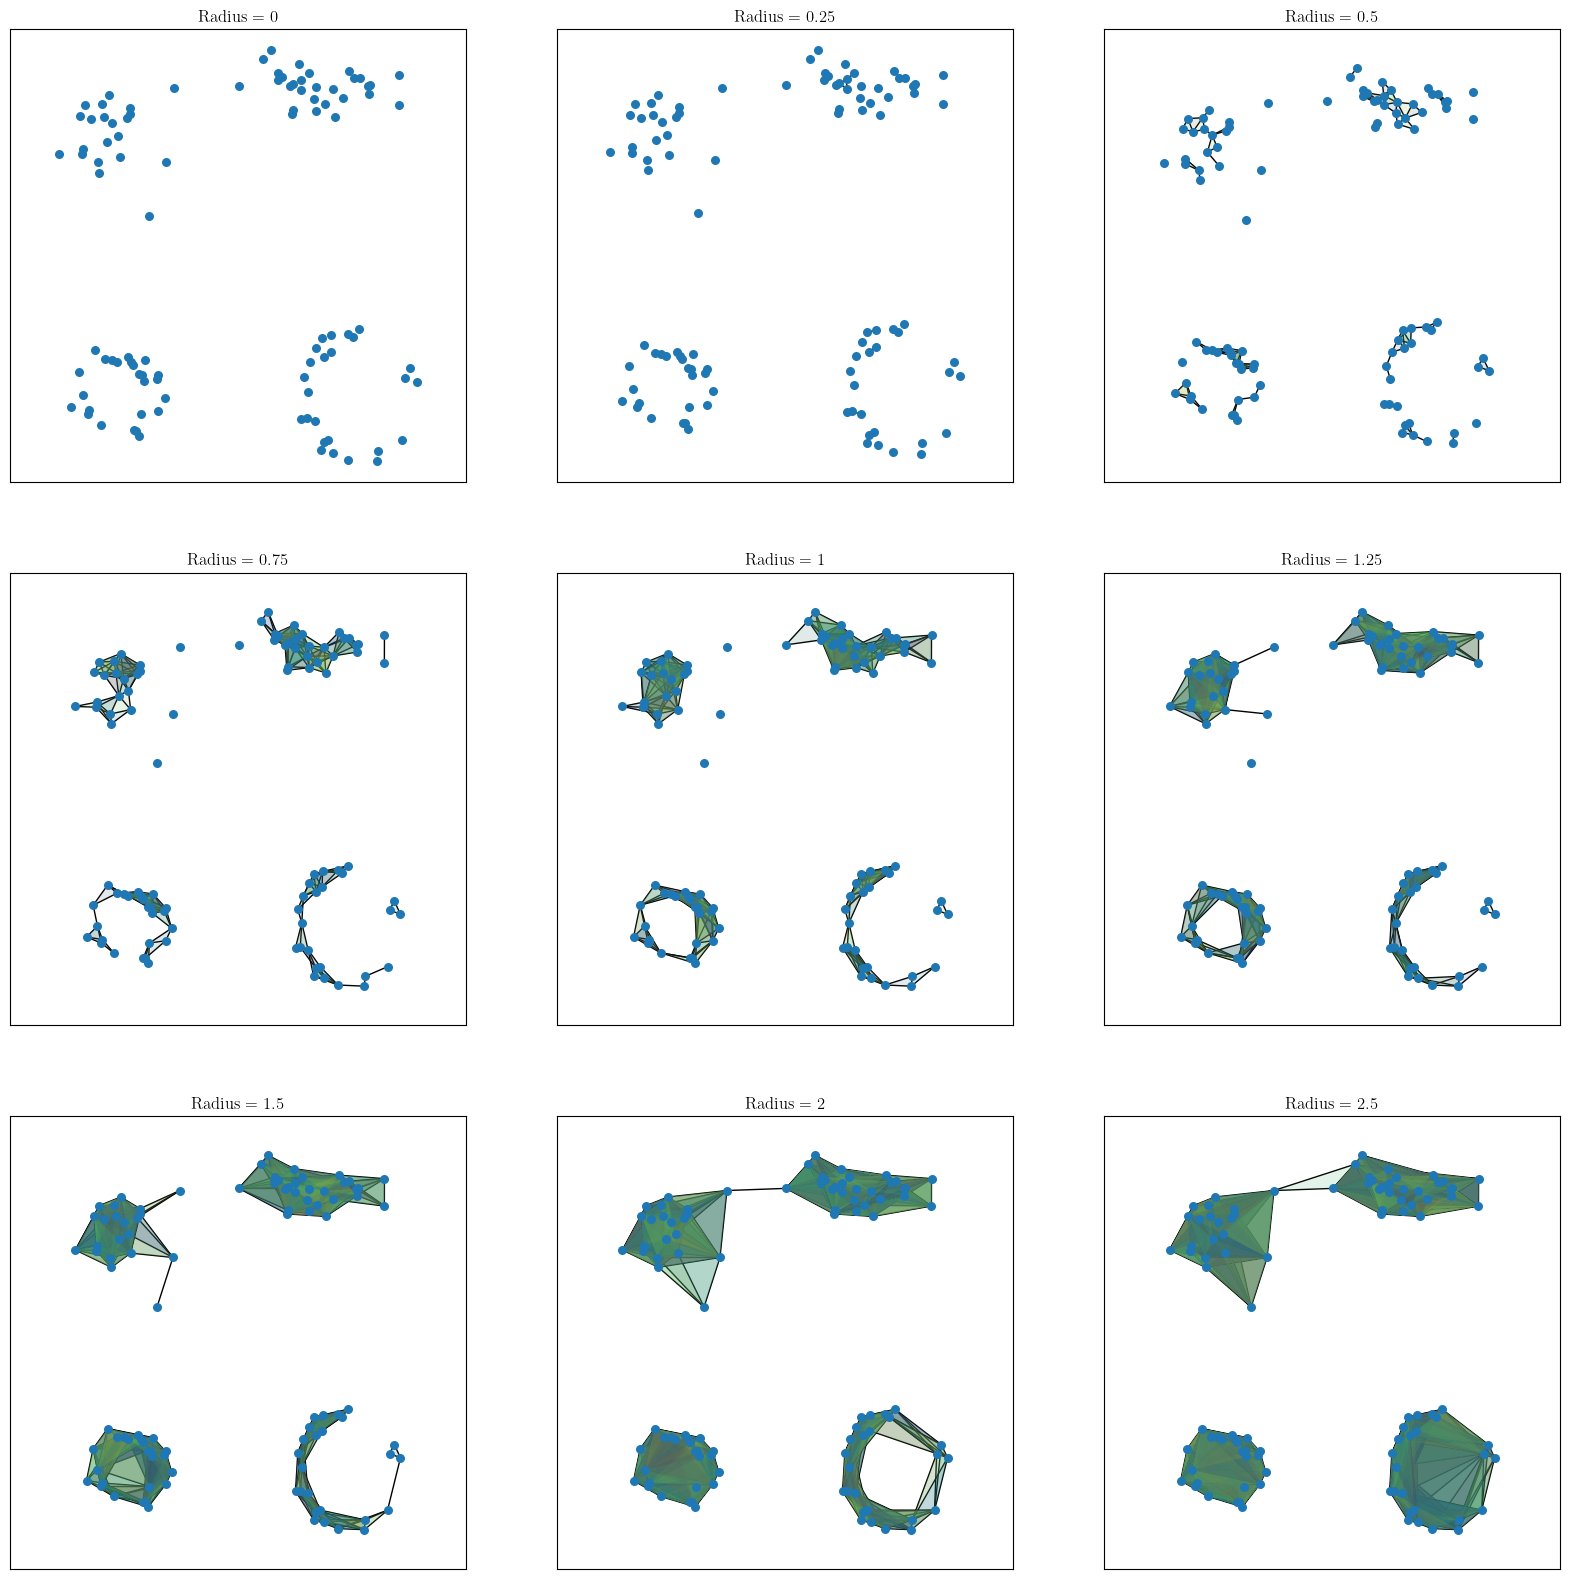

In [25]:
rs = [0,0.25,0.5,0.75,1,1.25,1.5,2,2.5]
pos = {n:X[n,:] for n in range(len(X))}

plt.figure(figsize = (20,20))

for (j,r) in enumerate(rs):
    G, two_spx_list = create_2_dim_simplicial_complex(D,r)
    patches = []

    for i,spx in enumerate(two_spx_list):
        position_array = np.array([[pos[vert][0],pos[vert][1]] for vert in spx])
        polygon = Polygon(position_array, True)
        patches.append(polygon)
        
    ax = plt.subplot(3,3,j+1)
    nx.draw_networkx(G, pos = pos, with_labels = False,node_size = 30)
    colors = 100*np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=0.05)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    
    print('Radius',r,'done...')
    
    plt.axis('equal')
    plt.title('Radius = '+str(r))

plt.show()

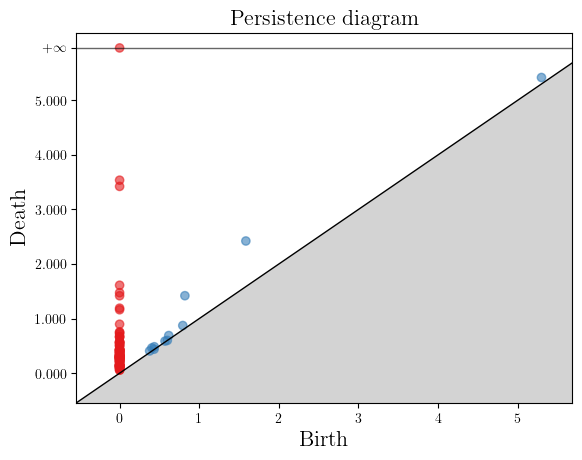

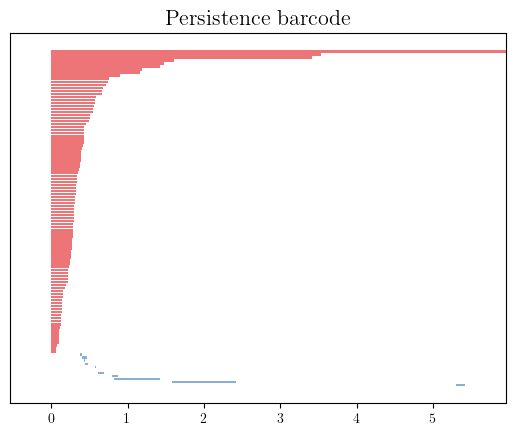

In [26]:
skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 10) 
Rips_complex = skeleton.create_simplex_tree(max_dimension = 2)
BarCodes = Rips_complex.persistence()

gd.plot_persistence_diagram(BarCodes)
plt.show()

gd.plot_persistence_barcode(BarCodes)
plt.show()

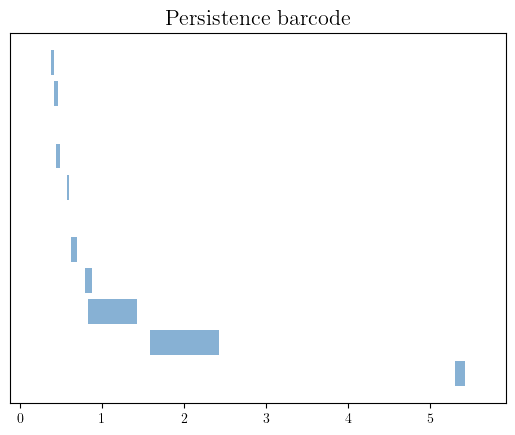

In [27]:
gd.plot_persistence_barcode([bar for bar in BarCodes if bar[0] == 1])
plt.show()

Let's summarize everything into the following function which will take a point cloud and produce either barcodes or persistence diagrams. 

In [31]:
def visualize_persistent_homology(X, style = 'barcodes', max_dimension = 2):

    """
    In: X is a Euclidean point cloud of size [num_points,dimension]
        style = 'barcodes' or 'diagrams'
        max_dimension = highest dimensional skeleton of the VR complex to compute. Highest degree
        persistent homology will be one less than this.
    Out: plots either persistence barcodes or persistence diagrams
    """
    
    D = pairwise_distances(X)
    skeleton = gd.RipsComplex(distance_matrix = D, max_edge_length = 10) 
    Rips_complex = skeleton.create_simplex_tree(max_dimension = max_dimension)
    BarCodes = Rips_complex.persistence()

    if style == 'barcodes':
        for dim in range(max_dimension):
            print('Dimension',dim)
            plt.figure()
            gd.plot_persistence_barcode([bar for bar in BarCodes if bar[0] == dim])
            plt.show()
    elif style == 'diagrams':
        plt.figure()
        gd.plot_persistence_diagram(BarCodes)
        plt.show()
            
    return

Now, let's try it on a different dataset.

In [28]:
def create_circle_data(radius, x_offset, noise1 = 0.5, noise2 = 0.5, num_points1 = 50, num_points2 = 50):
    """
    Use ChatGPT to create comments for code blocks!
    
    This function generates a dataset with two classes in the shape of concentric circles.
    
    Args:
    radius (float) : The radius of Inner Circle > 0
    x_offset (float) : Distance between Centroids of both circles along x-axis (Right to Left)
    noise1 (float) : Noise factor for Class 1 [random uniform addition]
    noise2 (float) : Noise factor for Class 2 [random uniform addition]
    num_points1 (int) : No. of points in Class 1
    num_points2 (int) : No. of points in Class 2
    
    Returns:
    X: A numpy array with dimensions (num_points1+num_points2, 2).
        The first num_points1 rows will be in the shape
        of an inner circle, and the remaining rows will be in
        the shape of an outer concentric circle
        
    """

    # Generate Points for Class 1 - Left Circle:
    A = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = num_points1)
    A = A.T/np.linalg.norm(A,axis = 1) # Normalize them to Unit Vectors
    A = A.T + noise1*np.random.rand(num_points1,2) # Add some Uniform Random noise to it.

    # Generate Points for Class 2 - Right Circle:
    B = np.random.multivariate_normal([0,0],np.array([[1,0],[0,1]]),size = num_points2)
    B = radius*B.T/np.linalg.norm(B,axis = 1) # Scale them up to provided Radius
    B = B.T + noise2*np.random.rand(num_points2,2) + [x_offset,0] # Shift & Add Random noise

    # Concatenate the Class1 & Class2 datasets:
    X = np.concatenate((A,B))
    
    return X

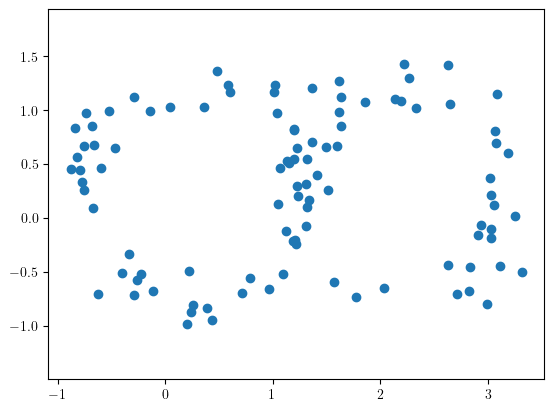

In [29]:
X = create_circle_data(1,2)

plt.plot(X[:,0],X[:,1],'o')
plt.axis('equal')
plt.show()

Dimension 0


<Figure size 640x480 with 0 Axes>

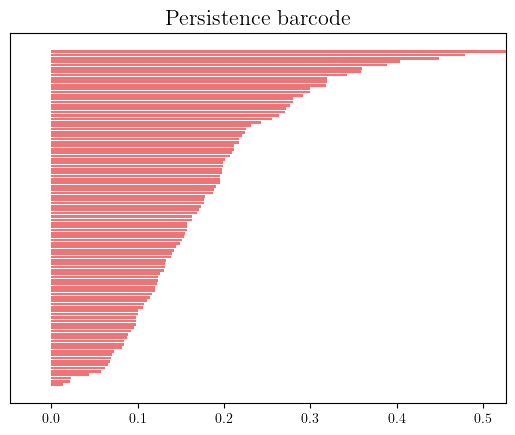

Dimension 1


<Figure size 640x480 with 0 Axes>

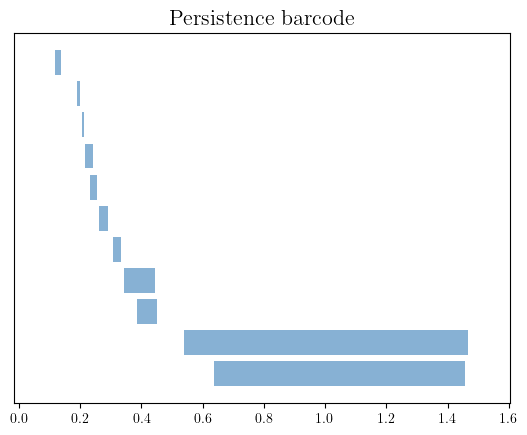

<Figure size 640x480 with 0 Axes>

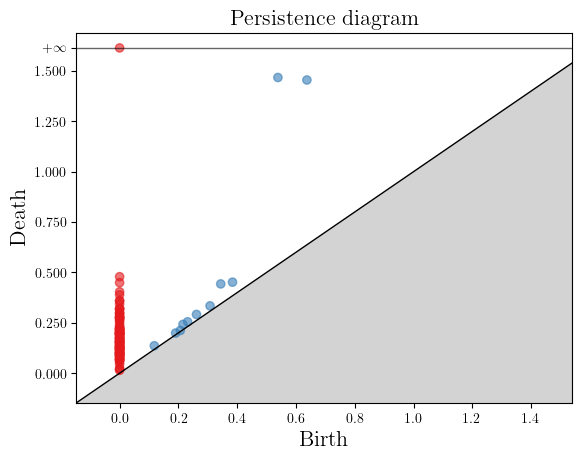

In [33]:
visualize_persistent_homology(X, style = 'barcodes')
visualize_persistent_homology(X, style = 'diagrams')

## 3D Examples

Next we can look at some simple 3-dimensional point clouds. We'll start with a sphere.

In [34]:
# Define a function to sample randomly from a sphere
def sample_spherical(npoints, ndim=3):
    """
    Generates random samples on a unit sphere of the given dimensions.

    Parameters:
        - npoints : integer : number of points to generate
        - ndim: integer : Dimensions of the sphere, default value is 3

    Returns:
        - sample : ndarray : Object, array of shape [npoints, ndim] containing random samples.
    """
    # Generate an ndarray of shape (ndim, npoints) with normal disribution random numbers 
    sample = np.random.randn(ndim, npoints)
    # Divide each column by its length, so it lies on the unit sphere
    sample /= np.linalg.norm(sample, axis=0)
    # Transpose the matrix to get an (npoints, ndim) ndarray
    sample = sample.T
    return sample

# Randomly sample from a sphere with added noise
def noisy_sample_spherical(npoints, ndim, noise_level = 0.01):
    """
    Adds Gaussian noise to the samples generated in `sample_spherical` function.
    
    Parameters:
        - npoints : integer : number of points to generate
        - ndim: integer : Dimensions of the sphere
        - noise_level : float : Variance of Gaussian noise 

    Returns:
        - sample : ndarray : Object, array of shape [npoints, ndim] containing noisy samples.
    """
    # Calls sample_spherical to generate a sphere with some number of points and dimensions
    sphere = sample_spherical(npoints, ndim)
    # Forms a noise matrix by using a multivariate gaussian with mean 0 and specified covariance(noise_level*np.eye(ndim))
    noise = np.random.multivariate_normal(ndim*[0], noise_level*np.eye(ndim), npoints)
    # adds some gaussian noise to the dataset at each sample along every dimension
    sample = sphere + noise
    return sample


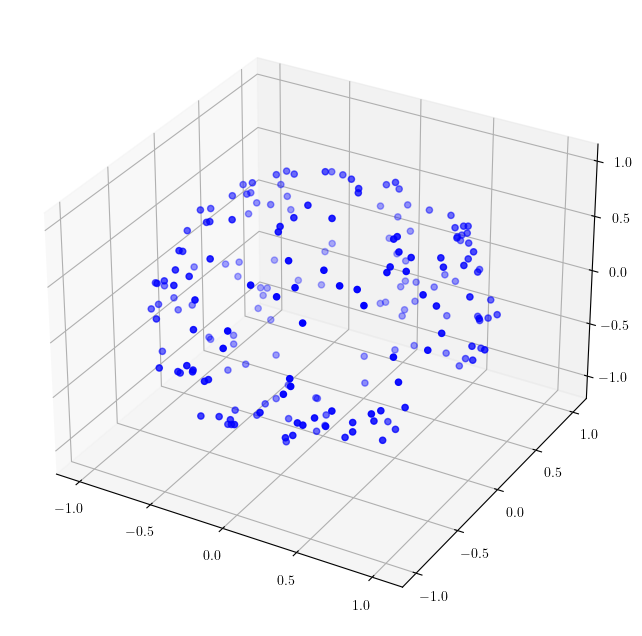

In [35]:
data = noisy_sample_spherical(200,3,noise_level = .001)
# Generate the noisy circle.

# Plot the data as a scatter plot.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d', adjustable='box')
ax.scatter(data[:,0],data[:,1],data[:,2], c='b', marker='o');

For this example, we'd like to look at higher dimensional homology. Unfortunately, `gudhi` is a bit slow for computing higher dimensional persistent homology (I believe that it has some ways to sparsify simplicial complexes, which may make it faster). You can try running the function we created above, but it will take quite a while to run.

In [36]:
visualize_persistent_homology(data, max_dimension=3)

KeyboardInterrupt: 

We can instead use a different TDA package which is optimized specifically to handle Vietoris-Rips persistent homology on point clouds. The algorithm is called `ripser`. To install `ripser` as well as the `persim` package (which includes some visualization tools, plus some functions for vectorizing persistence diagrams that we will discuss later), you can install the `scikit-tda` package: see https://scikit-tda.org/index.html. 


In [37]:
from ripser import ripser
from persim import plot_diagrams 

`ripser` does the job a lot more quickly, but is still not super fast if we compute higher dimensional persistent homology on large point clouds. You can experiment with parameters here to see how far you can push this.

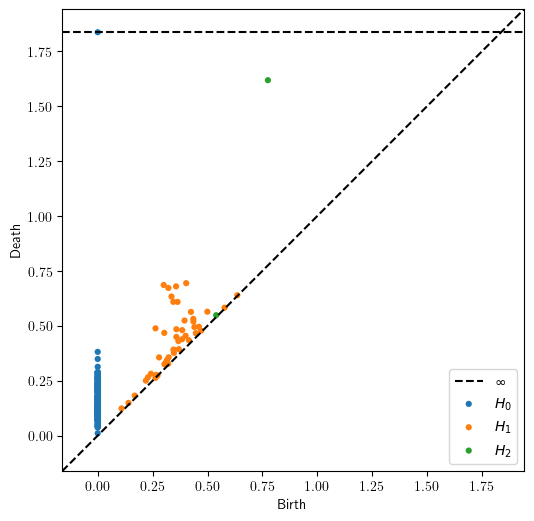

CPU times: user 2.64 s, sys: 893 ms, total: 3.54 s
Wall time: 1.37 s


In [38]:
%%time
dgms = ripser(data, maxdim=2)['dgms']
fig = plt.figure(figsize=(6,6))
plot_diagrams(dgms, show=True)

The following point cloud lies on the surface of a donut in 3-dimensional space (called a *torus*).

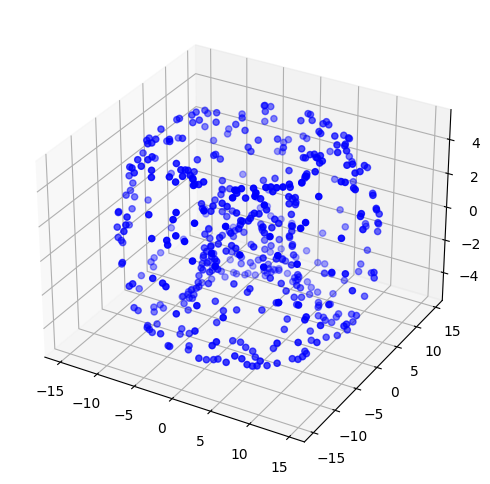

In [42]:
N = 500
r = 5
R = 10

theta = 2*np.pi*np.random.rand(N)
phi = 2*np.pi*np.random.rand(N)
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta) 
Z = r *  np.sin(phi)
pointCloud = np.append(X.reshape(N,1),Y.reshape(N,1),axis =1)
pointCloud = np.append(pointCloud,Z.reshape(N,1), axis = 1)


fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection='3d', adjustable='box')
ax.scatter(pointCloud[:,0],pointCloud[:,1],pointCloud[:,2], c='b', marker='o');

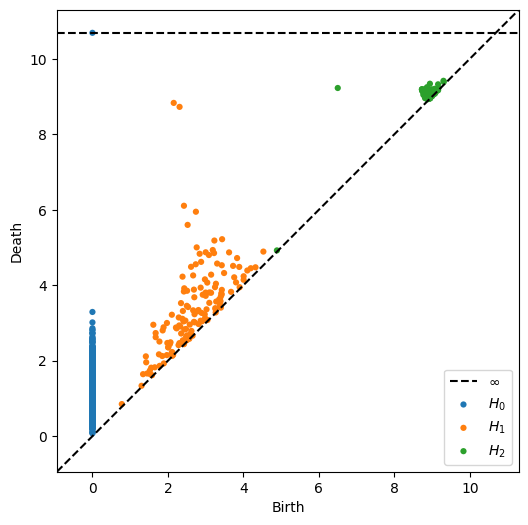

CPU times: user 10.8 s, sys: 2.02 s, total: 12.8 s
Wall time: 10.6 s


In [43]:
%%time
dgms = ripser(pointCloud, maxdim=2)['dgms']
fig = plt.figure(figsize=(6,6))
plot_diagrams(dgms, show=True)

When sampling a torus, we need to sample fairly densely to get a strong topological signal.

`Ripser++` is a recent package for computing persistent homology using both CPU and GPU. It is supposed to be faster than `Ripser`. If you are interested, you can have a look at https://github.com/simonzhang00/ripser-plusplus